# Explore Pattern Between Taxi Engagement Time and Neighborhoods in New York City

## Table of contents
* [Introduction: Business Problem](#introduction)
* [About Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>
Imaging someone is looking for his/her own chance in running a personal cab business in a city like New York.  A few questions may need to be answered:  

- Where (which zone) may have more potential passenagers at a given time?  
- How to make a plan for daily schedule?   

Normally, a new taxi driver may need several months to figure these out.  

In this project I will explore New York City taxi trip records and try to find a general pattern to help a new taxi driver to find a passenger more efficiently.

## About Data <a name="data"></a>
The whole practice will use several different data sources, including:  

### Taxi Trip Data
https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page provides "Data of trips taken by taxis and for-hire vehicles in New York City".  "The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts".  I'll use pick-up/drop-off dates/times and locations in green taxi trip data for this practice.

### Foursquare Location Data
The taxi pick-up/drop-off locations nearby venue info can be queried via Foursquare API.  And the nearby venue info will be used for neighborhood segmentation and clustering.

### Latitude and Longitude of Location
The code to request Latitude and longitude information would look something like following:

In [1]:
import geocoder

g = geocoder.arcgis('Alphabet City, Manhattan')
latitude = g.lat
longitude = g.lng
print('The geograpical coordinate of East Harlem North, Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of East Harlem North, Manhattan are 40.725990000000024, -73.98056999999994.


### Data Prepare
Data prepare related work has been done in: [The_Battle_of_Neighborhoods_Data_Prepare.ipynb](https://github.com/zeke21n/Coursera_Capstone/blob/master/The_Battle_of_Neighborhoods_Data_Prepare.ipynb)  
All processed data has been saved as .csv file and will be used in Methodology section.  I'll explain in detail about these data files in [Analysis](#analysis) section.

## Methodology<a name="methodology"></a>
In this project, I explore the most common nearby venues for each zone via Foursquare location data, and record the most common venues for each neighborhoods.  
Then, use New York yellow taxi trip data of 2019-12 to explore pick-up time for each zone, and calculate average pick-up rate by hours in a day.  
In third step, above two dataframes can be combined into one dataframe by their location info.  
Finally, I can visualize the data and find out the relationship between taxi pick-up time and nearby venues.

## Analysis <a name="analysis"></a>
First, import libraries and read data from prepared .csv files.

In [2]:
import numpy as np # library to handle data in a vectorized manner
np.random.seed(0)

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns # seaborn for hotmap
sns.set()

File 'neighborhoods_venues_sorted.csv' contains the most common venues for each NYC taxi zone.

In [3]:
neighborhoods_venues_sorted = pd.read_csv('neighborhoods_venues_sorted.csv')
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(261, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Allerton/Pelham Gardens, Bronx",Bus Station,Pharmacy,Deli / Bodega,Chinese Restaurant,Donut Shop,Sandwich Place,Plaza,Pizza Place,Liquor Store,Grocery Store
1,"Alphabet City, Manhattan",Coffee Shop,Japanese Restaurant,Pizza Place,Ice Cream Shop,Grocery Store,Juice Bar,Italian Restaurant,Bar,Speakeasy,American Restaurant
2,"Arden Heights, Staten Island",Trail,Construction & Landscaping,Asian Restaurant,Arts & Crafts Store,Bowling Alley,Dessert Shop,Farm,Fast Food Restaurant,Field,Filipino Restaurant
3,"Arrochar/Fort Wadsworth, Staten Island",Deli / Bodega,College Gym,Food Truck,Bus Stop,Park,Bar,Furniture / Home Store,Pizza Place,Historic Site,Event Service
4,"Astoria Park, Queens",Park,Playground,Deli / Bodega,Bar,Italian Restaurant,Pharmacy,Basketball Court,Tennis Stadium,Nail Salon,Steakhouse


File 'trip_pickup.csv' records the pick-up rate by hours in a days for each zone.

In [4]:
trip_pickup = pd.read_csv('trip_pickup.csv')
print(trip_pickup.shape)
trip_pickup.head()

(265, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.003212,0.002141,0.011777,0.014989,0.029979,0.034261,0.038544,0.028908,0.049251,0.031049,0.043897,0.040685,0.055675,0.069593,0.101713,0.083512,0.091006,0.093148,0.065310,0.073876,0.018201,0.011777,0.007495,0.004283
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.333333,0.000000
2,0.010638,0.010638,0.010638,0.010638,0.053191,0.031915,0.234043,0.021277,0.031915,0.095745,0.010638,0.042553,0.021277,0.042553,0.063830,0.021277,0.031915,0.063830,0.021277,0.053191,0.042553,0.042553,0.031915,0.021277
3,0.081151,0.078388,0.069435,0.040766,0.020097,0.008667,0.017049,0.035051,0.054196,0.048957,0.041528,0.032765,0.033146,0.033241,0.031527,0.032956,0.031146,0.039909,0.044671,0.050291,0.053243,0.052386,0.069435,0.076864
4,0.031250,0.000000,0.000000,0.000000,0.000000,0.031250,0.031250,0.031250,0.156250,0.031250,0.156250,0.031250,0.031250,0.000000,0.000000,0.093750,0.062500,0.218750,0.062500,0.031250,0.000000,0.000000,0.000000,0.031250


As 'trip_pickup.csv' doesn't include location info, I'll need to combine it with 'taxi_zone_location.csv' via their index.

In [5]:
taxi_zone_location = pd.read_csv('taxi_zone_location.csv')
print(taxi_zone_location.shape)
taxi_zone_location.head()

(265, 3)


,location,Latitude,Longitude
0,"Newark Airport, EWR",40.692879,-74.185448
1,"Jamaica Bay, Queens",40.614292,-73.838264
2,"Allerton/Pelham Gardens, Bronx",40.863930,-73.843391
3,"Alphabet City, Manhattan",40.728039,-73.984993
4,"Arden Heights, Staten Island",40.554138,-74.173912


Dataframe neighborhoods_venues_sorted only has **261** records, but taxi_zone_location has **265** records, which means 4 taxi zones don't have nearby venue info.  Following code create a new dataframe named 'neighborhoods_venues_sorted_full' and fill in None for these Neighborhoods.

In [6]:
neighborhoods_venues_sorted_full = pd.DataFrame(data={'Neighborhood':[],
                   '1st Most Common Venue':[],
                   '2nd Most Common Venue':[],
                   '3rd Most Common Venue':[],
                   '4th Most Common Venue':[],
                   '5th Most Common Venue':[],
                   '6th Most Common Venue':[],
                   '7th Most Common Venue':[],
                   '8th Most Common Venue':[],
                   '9th Most Common Venue':[],
                   '10th Most Common Venue':[]})
neighborhoods_venues_sorted_full

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [7]:
j = 0
for i in range(0,len(taxi_zone_location)):
    t = neighborhoods_venues_sorted.query('Neighborhood == "'+taxi_zone_location.location[i]+'"')
    if t.empty:
        t = pd.DataFrame(data={'Neighborhood':[taxi_zone_location.location[i]], '1st Most Common Venue':[None], '2nd Most Common Venue':[None], '3rd Most Common Venue':[None], '4th Most Common Venue':[None], '5th Most Common Venue':[None],
                              '6th Most Common Venue':[None], '7th Most Common Venue':[None],'8th Most Common Venue':[None], '9th Most Common Venue':[None], '10th Most Common Venue':[None]})
        neighborhoods_venues_sorted_full = neighborhoods_venues_sorted_full.append(t, ignore_index=True)
    else:
        neighborhoods_venues_sorted_full = neighborhoods_venues_sorted_full.append(t, ignore_index=True)

print(neighborhoods_venues_sorted_full.shape)
neighborhoods_venues_sorted_full.head()

(265, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Newark Airport, EWR",Rental Car Location,Hotel Bar,Brewery,American Restaurant,Hotel,Zoo,Flower Shop,Farmers Market,Fast Food Restaurant,Field
1,"Jamaica Bay, Queens",None,None,None,None,None,None,None,None,None,None
2,"Allerton/Pelham Gardens, Bronx",Bus Station,Pharmacy,Deli / Bodega,Chinese Restaurant,Donut Shop,Sandwich Place,Plaza,Pizza Place,Liquor Store,Grocery Store
3,"Alphabet City, Manhattan",Coffee Shop,Japanese Restaurant,Pizza Place,Ice Cream Shop,Grocery Store,Juice Bar,Italian Restaurant,Bar,Speakeasy,American Restaurant
4,"Arden Heights, Staten Island",Trail,Construction & Landscaping,Asian Restaurant,Arts & Crafts Store,Bowling Alley,Dessert Shop,Farm,Fast Food Restaurant,Field,Filipino Restaurant


Now, we have the full nearby venue data fro each zone, let's combine the data with pick-up rate data.

In [8]:
trip_pickup_venues = pd.merge(trip_pickup, neighborhoods_venues_sorted_full, left_index=True, right_index=True)
print(trip_pickup_venues.shape)
trip_pickup_venues.head()

(265, 35)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0.003212,0.002141,0.011777,0.014989,0.029979,0.034261,0.038544,0.028908,0.049251,0.031049,0.043897,0.040685,0.055675,0.069593,0.101713,0.083512,0.091006,0.093148,0.065310,0.073876,0.018201,0.011777,0.007495,0.004283,"Newark Airport, EWR",Rental Car Location,Hotel Bar,Brewery,American Restaurant,Hotel,Zoo,Flower Shop,Farmers Market,Fast Food Restaurant,Field
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.333333,0.000000,"Jamaica Bay, Queens",None,None,None,None,None,None,None,None,None,None
2,0.010638,0.010638,0.010638,0.010638,0.053191,0.031915,0.234043,0.021277,0.031915,0.095745,0.010638,0.042553,0.021277,0.042553,0.063830,0.021277,0.031915,0.063830,0.021277,0.053191,0.042553,0.042553,0.031915,0.021277,"Allerton/Pelham Gardens, Bronx",Bus Station,Pharmacy,Deli / Bodega,Chinese Restaurant,Donut Shop,Sandwich Place,Plaza,Pizza Place,Liquor Store,Grocery Store
3,0.081151,0.078388,0.069435,0.040766,0.020097,0.008667,0.017049,0.035051,0.054196,0.048957,0.041528,0.032765,0.033146,0.033241,0.031527,0.032956,0.031146,0.039909,0.044671,0.050291,0.053243,0.052386,0.069435,0.076864,"Alphabet City, Manhattan",Coffee Shop,Japanese Restaurant,Pizza Place,Ice Cream Shop,Grocery Store,Juice Bar,Italian Restaurant,Bar,Speakeasy,American Restaurant
4,0.031250,0.000000,0.000000,0.000000,0.000000,0.031250,0.031250,0.031250,0.156250,0.031250,0.156250,0.031250,0.031250,0.000000,0.000000,0.093750,0.062500,0.218750,0.062500,0.031250,0.000000,0.000000,0.000000,0.031250,"Arden Heights, Staten Island",Trail,Construction & Landscaping,Asian Restaurant,Arts & Crafts Store,Bowling Alley,Dessert Shop,Farm,Fast Food Restaurant,Field,Filipino Restaurant


In [9]:
trip_pickup_venues.iloc[[263,264]]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
263,0.031550,0.024586,0.016237,0.012082,0.010396,0.012403,0.025750,0.038333,0.047545,0.049552,0.054088,0.057982,0.055192,0.056115,0.059969,0.058463,0.054490,0.057560,0.059527,0.057400,0.055493,0.055413,0.049874,0.039417,"NV, Unknown",Coffee Shop,Gym / Fitness Center,Plaza,Gym,Sandwich Place,Bakery,Hotel,Sushi Restaurant,Park,Deli / Bodega
264,0.075192,0.083452,0.068072,0.045856,0.035318,0.020222,0.021361,0.019083,0.021077,0.030191,0.037026,0.046426,0.035602,0.030760,0.038451,0.037311,0.045286,0.037311,0.045286,0.051837,0.043577,0.060097,0.071205,0.067217,"nan, Unknown",Coffee Shop,Gym / Fitness Center,Plaza,Gym,Sandwich Place,Bakery,Hotel,Sushi Restaurant,Park,Deli / Bodega


There are two records of unknown neighborhood, remove them.

In [10]:
# Drop the unknown neighborhood
trip_pickup_venues = trip_pickup_venues.drop([263,264])
print(trip_pickup_venues.shape)

(263, 35)


In [11]:
trip_pickup_venues_most_common = trip_pickup_venues.sort_values(by=['1st Most Common Venue'])
print(trip_pickup_venues_most_common.shape)
trip_pickup_venues_most_common.head()

(263, 35)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
137,0.038279,0.012312,0.004968,0.001063,0.000583,0.001069,0.002055,0.017241,0.038170,0.049784,0.063606,0.064733,0.062288,0.063651,0.067915,0.069599,0.068306,0.069938,0.063651,0.064919,0.058760,0.062179,0.054931,0.048676,"LaGuardia Airport, Queens",Airport Lounge,Airport Service,Rental Car Location,Burger Joint,Hotel,Pizza Place,Snack Place,Bar,Coffee Shop,Bakery
97,0.015873,0.015873,0.000000,0.000000,0.000000,0.015873,0.095238,0.095238,0.079365,0.190476,0.111111,0.063492,0.079365,0.063492,0.015873,0.000000,0.031746,0.015873,0.015873,0.015873,0.031746,0.047619,0.000000,0.000000,"Fresh Meadows, Queens",American Restaurant,Shopping Mall,Bank,Kids Store,Department Store,Chinese Restaurant,Pizza Place,Coffee Shop,Pet Store,Mexican Restaurant
152,0.025974,0.025974,0.000000,0.000000,0.025974,0.000000,0.000000,0.000000,0.116883,0.103896,0.025974,0.051948,0.025974,0.064935,0.090909,0.090909,0.012987,0.038961,0.064935,0.025974,0.051948,0.090909,0.064935,0.012987,"Marble Hill, Manhattan",American Restaurant,Gym,Sandwich Place,Coffee Shop,Pharmacy,Pizza Place,Donut Shop,Tennis Stadium,Video Game Store,Ice Cream Shop
250,0.333333,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,"Westerleigh, Staten Island",Arcade,Zoo,Factory,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service
67,0.041846,0.031247,0.027413,0.022299,0.014057,0.008484,0.019719,0.027617,0.037477,0.041247,0.044718,0.048833,0.055489,0.055947,0.054094,0.051839,0.050088,0.058463,0.066622,0.064367,0.059049,0.062030,0.057056,0.051196,"East Chelsea, Manhattan",Art Gallery,Coffee Shop,American Restaurant,Theater,Cupcake Shop,Restaurant,Park,Bagel Shop,Italian Restaurant,Grocery Store


The dataframe is almost cleaned up, one more step to set the most common venue as the index.

In [12]:
trip_pickup_venues_most_common["The_Most_Common_Venue_in_Neighborhood"] = trip_pickup_venues_most_common["1st Most Common Venue"] + " in  " + trip_pickup_venues_most_common["Neighborhood"]
trip_pickup_venues_most_common.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,The_Most_Common_Venue_in_Neighborhood
137,0.038279,0.012312,0.004968,0.001063,0.000583,0.001069,0.002055,0.017241,0.038170,0.049784,0.063606,0.064733,0.062288,0.063651,0.067915,0.069599,0.068306,0.069938,0.063651,0.064919,0.058760,0.062179,0.054931,0.048676,"LaGuardia Airport, Queens",Airport Lounge,Airport Service,Rental Car Location,Burger Joint,Hotel,Pizza Place,Snack Place,Bar,Coffee Shop,Bakery,"Airport Lounge in LaGuardia Airport, Queens"
97,0.015873,0.015873,0.000000,0.000000,0.000000,0.015873,0.095238,0.095238,0.079365,0.190476,0.111111,0.063492,0.079365,0.063492,0.015873,0.000000,0.031746,0.015873,0.015873,0.015873,0.031746,0.047619,0.000000,0.000000,"Fresh Meadows, Queens",American Restaurant,Shopping Mall,Bank,Kids Store,Department Store,Chinese Restaurant,Pizza Place,Coffee Shop,Pet Store,Mexican Restaurant,"American Restaurant in Fresh Meadows, Queens"
152,0.025974,0.025974,0.000000,0.000000,0.025974,0.000000,0.000000,0.000000,0.116883,0.103896,0.025974,0.051948,0.025974,0.064935,0.090909,0.090909,0.012987,0.038961,0.064935,0.025974,0.051948,0.090909,0.064935,0.012987,"Marble Hill, Manhattan",American Restaurant,Gym,Sandwich Place,Coffee Shop,Pharmacy,Pizza Place,Donut Shop,Tennis Stadium,Video Game Store,Ice Cream Shop,"American Restaurant in Marble Hill, Manhattan"
250,0.333333,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,"Westerleigh, Staten Island",Arcade,Zoo,Factory,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,"Arcade in Westerleigh, Staten Island"
67,0.041846,0.031247,0.027413,0.022299,0.014057,0.008484,0.019719,0.027617,0.037477,0.041247,0.044718,0.048833,0.055489,0.055947,0.054094,0.051839,0.050088,0.058463,0.066622,0.064367,0.059049,0.062030,0.057056,0.051196,"East Chelsea, Manhattan",Art Gallery,Coffee Shop,American Restaurant,Theater,Cupcake Shop,Restaurant,Park,Bagel Shop,Italian Restaurant,Grocery Store,"Art Gallery in East Chelsea, Manhattan"


In [13]:
trip_pickup_venues_most_common.set_index('The_Most_Common_Venue_in_Neighborhood', inplace=True)
print(trip_pickup_venues_most_common.shape)
trip_pickup_venues_most_common.head()

(263, 35)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
The_Most_Common_Venue_in_Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Airport Lounge in LaGuardia Airport, Queens",0.038279,0.012312,0.004968,0.001063,0.000583,0.001069,0.002055,0.017241,0.038170,0.049784,0.063606,0.064733,0.062288,0.063651,0.067915,0.069599,0.068306,0.069938,0.063651,0.064919,0.058760,0.062179,0.054931,0.048676,"LaGuardia Airport, Queens",Airport Lounge,Airport Service,Rental Car Location,Burger Joint,Hotel,Pizza Place,Snack Place,Bar,Coffee Shop,Bakery
"American Restaurant in Fresh Meadows, Queens",0.015873,0.015873,0.000000,0.000000,0.000000,0.015873,0.095238,0.095238,0.079365,0.190476,0.111111,0.063492,0.079365,0.063492,0.015873,0.000000,0.031746,0.015873,0.015873,0.015873,0.031746,0.047619,0.000000,0.000000,"Fresh Meadows, Queens",American Restaurant,Shopping Mall,Bank,Kids Store,Department Store,Chinese Restaurant,Pizza Place,Coffee Shop,Pet Store,Mexican Restaurant
"American Restaurant in Marble Hill, Manhattan",0.025974,0.025974,0.000000,0.000000,0.025974,0.000000,0.000000,0.000000,0.116883,0.103896,0.025974,0.051948,0.025974,0.064935,0.090909,0.090909,0.012987,0.038961,0.064935,0.025974,0.051948,0.090909,0.064935,0.012987,"Marble Hill, Manhattan",American Restaurant,Gym,Sandwich Place,Coffee Shop,Pharmacy,Pizza Place,Donut Shop,Tennis Stadium,Video Game Store,Ice Cream Shop
"Arcade in Westerleigh, Staten Island",0.333333,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,"Westerleigh, Staten Island",Arcade,Zoo,Factory,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service
"Art Gallery in East Chelsea, Manhattan",0.041846,0.031247,0.027413,0.022299,0.014057,0.008484,0.019719,0.027617,0.037477,0.041247,0.044718,0.048833,0.055489,0.055947,0.054094,0.051839,0.050088,0.058463,0.066622,0.064367,0.059049,0.062030,0.057056,0.051196,"East Chelsea, Manhattan",Art Gallery,Coffee Shop,American Restaurant,Theater,Cupcake Shop,Restaurant,Park,Bagel Shop,Italian Restaurant,Grocery Store


Let's take a look how does the pick-up rate look like for each zone.

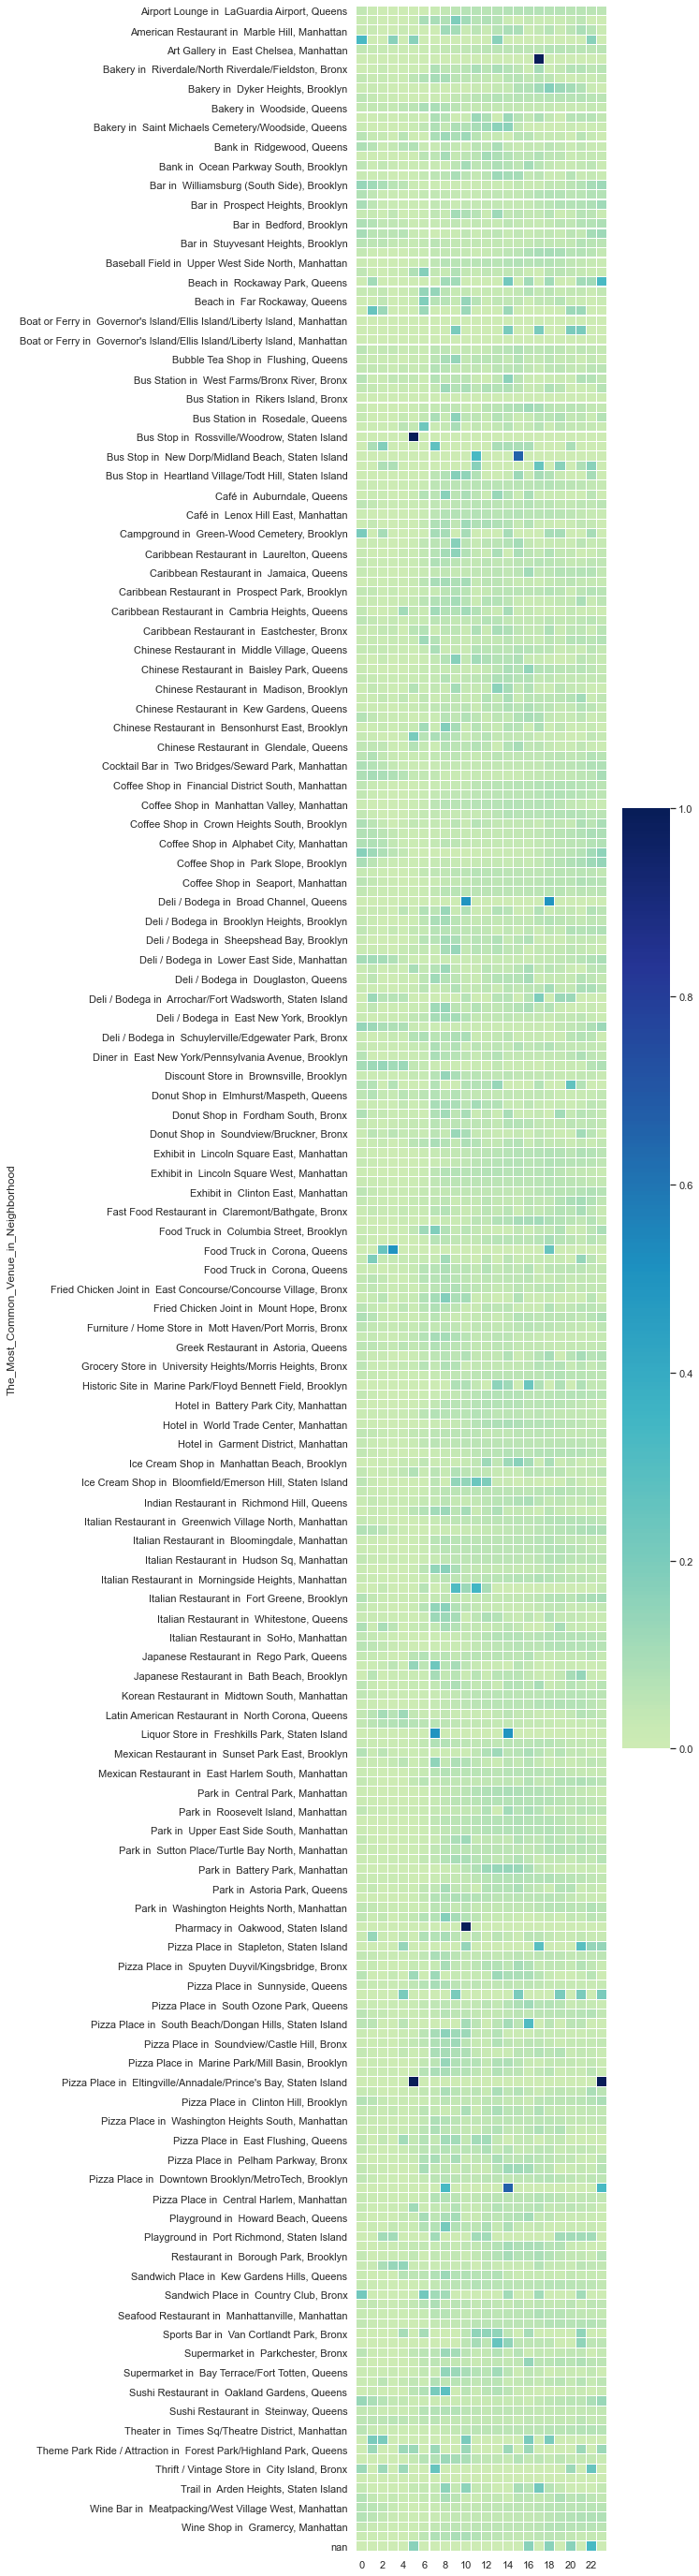

In [14]:
plt.figure(figsize=(6,50))
trip_pickup_time = trip_pickup_venues_most_common.iloc[:, lambda df: range(0,24)]
ax = sns.heatmap(trip_pickup_time, linewidths=.05, center=0.35, cmap="YlGnBu")
plt.show()

It looks like same types of nearby venues may have the similiar pick-up rate. I'll use 'Bar', 'Coffee Shop', 'Park' and 'Italian Restaurant' to have a close look.

In [15]:
trip_time = trip_pickup_venues_most_common
trip_time.rename(columns = {"1st Most Common Venue":"The_Most_Common_Venue"}, inplace=True)
print(trip_time.shape)
trip_time.head()

(263, 35)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Neighborhood,The_Most_Common_Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
The_Most_Common_Venue_in_Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Airport Lounge in LaGuardia Airport, Queens",0.038279,0.012312,0.004968,0.001063,0.000583,0.001069,0.002055,0.017241,0.038170,0.049784,0.063606,0.064733,0.062288,0.063651,0.067915,0.069599,0.068306,0.069938,0.063651,0.064919,0.058760,0.062179,0.054931,0.048676,"LaGuardia Airport, Queens",Airport Lounge,Airport Service,Rental Car Location,Burger Joint,Hotel,Pizza Place,Snack Place,Bar,Coffee Shop,Bakery
"American Restaurant in Fresh Meadows, Queens",0.015873,0.015873,0.000000,0.000000,0.000000,0.015873,0.095238,0.095238,0.079365,0.190476,0.111111,0.063492,0.079365,0.063492,0.015873,0.000000,0.031746,0.015873,0.015873,0.015873,0.031746,0.047619,0.000000,0.000000,"Fresh Meadows, Queens",American Restaurant,Shopping Mall,Bank,Kids Store,Department Store,Chinese Restaurant,Pizza Place,Coffee Shop,Pet Store,Mexican Restaurant
"American Restaurant in Marble Hill, Manhattan",0.025974,0.025974,0.000000,0.000000,0.025974,0.000000,0.000000,0.000000,0.116883,0.103896,0.025974,0.051948,0.025974,0.064935,0.090909,0.090909,0.012987,0.038961,0.064935,0.025974,0.051948,0.090909,0.064935,0.012987,"Marble Hill, Manhattan",American Restaurant,Gym,Sandwich Place,Coffee Shop,Pharmacy,Pizza Place,Donut Shop,Tennis Stadium,Video Game Store,Ice Cream Shop
"Arcade in Westerleigh, Staten Island",0.333333,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,"Westerleigh, Staten Island",Arcade,Zoo,Factory,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service
"Art Gallery in East Chelsea, Manhattan",0.041846,0.031247,0.027413,0.022299,0.014057,0.008484,0.019719,0.027617,0.037477,0.041247,0.044718,0.048833,0.055489,0.055947,0.054094,0.051839,0.050088,0.058463,0.066622,0.064367,0.059049,0.062030,0.057056,0.051196,"East Chelsea, Manhattan",Art Gallery,Coffee Shop,American Restaurant,Theater,Cupcake Shop,Restaurant,Park,Bagel Shop,Italian Restaurant,Grocery Store


In [16]:
trip_time_bar = trip_time[trip_time.The_Most_Common_Venue == 'Bar']
trip_time_bar = trip_time_bar.iloc[:, lambda df: range(0,24)]
trip_time_bar = trip_time_bar.T
print(trip_time_bar.shape)
trip_time_bar.head()

(24, 7)


The_Most_Common_Venue_in_Neighborhood,"Bar in Williamsburg (South Side), Brooklyn","Bar in Boerum Hill, Brooklyn","Bar in Prospect Heights, Brooklyn","Bar in Bayside, Queens","Bar in Bedford, Brooklyn","Bar in South Williamsburg, Brooklyn","Bar in Stuyvesant Heights, Brooklyn"
0,0.133706,0.075460,0.095548,0.027778,0.085612,0.100977,0.061372
1,0.113995,0.043435,0.049946,0.027778,0.067776,0.058632,0.050542
2,0.093298,0.020416,0.027144,0.009259,0.045184,0.055375,0.052347
3,0.060775,0.017014,0.018458,0.046296,0.045184,0.052117,0.039711
4,0.051248,0.014612,0.014115,0.000000,0.036861,0.065147,0.032491


In [17]:
trip_time_coffee_shop = trip_time[trip_time.The_Most_Common_Venue == 'Coffee Shop']
trip_time_coffee_shop = trip_time_coffee_shop.iloc[:, lambda df: range(0,24)]
trip_time_coffee_shop = trip_time_coffee_shop.T
print(trip_time_coffee_shop.shape)
trip_time_coffee_shop.head()

(24, 12)


The_Most_Common_Venue_in_Neighborhood,"Coffee Shop in Financial District South, Manhattan","Coffee Shop in Financial District North, Manhattan","Coffee Shop in Manhattan Valley, Manhattan","Coffee Shop in JFK Airport, Queens","Coffee Shop in Crown Heights South, Brooklyn","Coffee Shop in East Village, Manhattan","Coffee Shop in Alphabet City, Manhattan","Coffee Shop in Williamsburg (North Side), Brooklyn","Coffee Shop in Park Slope, Brooklyn","Coffee Shop in Penn Station/Madison Sq West, Manhattan","Coffee Shop in Seaport, Manhattan","Coffee Shop in Clinton West, Manhattan"
0,0.043547,0.037222,0.012592,0.042846,0.083333,0.075088,0.081151,0.171122,0.092950,0.029422,0.058557,0.037232
1,0.024752,0.018820,0.007158,0.018815,0.053030,0.067725,0.078388,0.117662,0.056803,0.018989,0.037957,0.024552
2,0.014370,0.009178,0.004745,0.007080,0.034091,0.055922,0.069435,0.083595,0.031208,0.010486,0.026109,0.017214
3,0.007798,0.005563,0.003037,0.005207,0.000000,0.038525,0.040766,0.054769,0.019308,0.006085,0.012602,0.013986
4,0.004907,0.005725,0.004137,0.006327,0.026515,0.023345,0.020097,0.040618,0.015492,0.007142,0.007169,0.011123


In [18]:
trip_time_park = trip_time[trip_time.The_Most_Common_Venue == 'Park']
trip_time_park = trip_time_park.iloc[:, lambda df: range(0,24)]
trip_time_park = trip_time_park.T
print(trip_time_park.shape)
trip_time_park.head()

(24, 13)


The_Most_Common_Venue_in_Neighborhood,"Park in Central Park, Manhattan","Park in Upper West Side South, Manhattan","Park in Roosevelt Island, Manhattan","Park in Upper East Side North, Manhattan","Park in Upper East Side South, Manhattan","Park in Red Hook, Brooklyn","Park in Sutton Place/Turtle Bay North, Manhattan","Park in Ocean Hill, Brooklyn","Park in Battery Park, Manhattan","Park in West Chelsea/Hudson Yards, Manhattan","Park in Astoria Park, Queens","Park in Yorkville East, Manhattan","Park in Washington Heights North, Manhattan"
0,0.010478,0.015590,0.045872,0.007653,0.014265,0.033898,0.026374,0.015152,0.010910,0.024213,0.022472,0.006572,0.045536
1,0.004618,0.008208,0.018349,0.003885,0.006049,0.008475,0.018295,0.010101,0.004891,0.020717,0.033708,0.004113,0.036607
2,0.002019,0.004301,0.018349,0.001882,0.002872,0.000000,0.011404,0.010101,0.004515,0.019348,0.000000,0.002331,0.026786
3,0.000929,0.002437,0.013761,0.001155,0.001720,0.005650,0.007172,0.020202,0.001505,0.021174,0.011236,0.002074,0.016071
4,0.001563,0.003137,0.013761,0.001639,0.001907,0.008475,0.006953,0.015152,0.001881,0.012001,0.022472,0.003706,0.016964


In [19]:
trip_time_italian_restaurant = trip_time[trip_time.The_Most_Common_Venue == 'Italian Restaurant']
trip_time_italian_restaurant = trip_time_italian_restaurant.iloc[:, lambda df: range(0,24)]
trip_time_italian_restaurant = trip_time_italian_restaurant.T
print(trip_time_italian_restaurant.shape)
trip_time_italian_restaurant.head()

(24, 14)


The_Most_Common_Venue_in_Neighborhood,"Italian Restaurant in Greenwich Village North, Manhattan","Italian Restaurant in Greenwich Village South, Manhattan","Italian Restaurant in Bloomingdale, Manhattan","Italian Restaurant in UN/Turtle Bay South, Manhattan","Italian Restaurant in Hudson Sq, Manhattan","Italian Restaurant in Cobble Hill, Brooklyn","Italian Restaurant in Morningside Heights, Manhattan","Italian Restaurant in Charleston/Tottenville, Staten Island","Italian Restaurant in Fort Greene, Brooklyn","Italian Restaurant in Carroll Gardens, Brooklyn","Italian Restaurant in Whitestone, Queens","Italian Restaurant in Belmont, Bronx","Italian Restaurant in SoHo, Manhattan","Italian Restaurant in Little Italy/NoLiTa, Manhattan"
0,0.033922,0.077888,0.020321,0.020228,0.037161,0.020397,0.023743,0.00000,0.073574,0.035524,0.025000,0.083333,0.043585,0.059788
1,0.019822,0.071312,0.013514,0.011632,0.025344,0.006064,0.013616,0.00000,0.038311,0.016696,0.025000,0.013889,0.033309,0.048443
2,0.011801,0.054553,0.007671,0.007843,0.022016,0.002205,0.008510,0.03125,0.022421,0.013499,0.016667,0.097222,0.022896,0.037018
3,0.007561,0.028032,0.007112,0.005272,0.016367,0.002481,0.006099,0.00000,0.011754,0.002842,0.008333,0.055556,0.010510,0.026693
4,0.005558,0.012721,0.007519,0.005798,0.009710,0.002756,0.006836,0.00000,0.012407,0.004618,0.008333,0.000000,0.004513,0.015504


d:\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
d:\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
d:\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
d:\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: Matp


Figure 2: Univariate Histograms


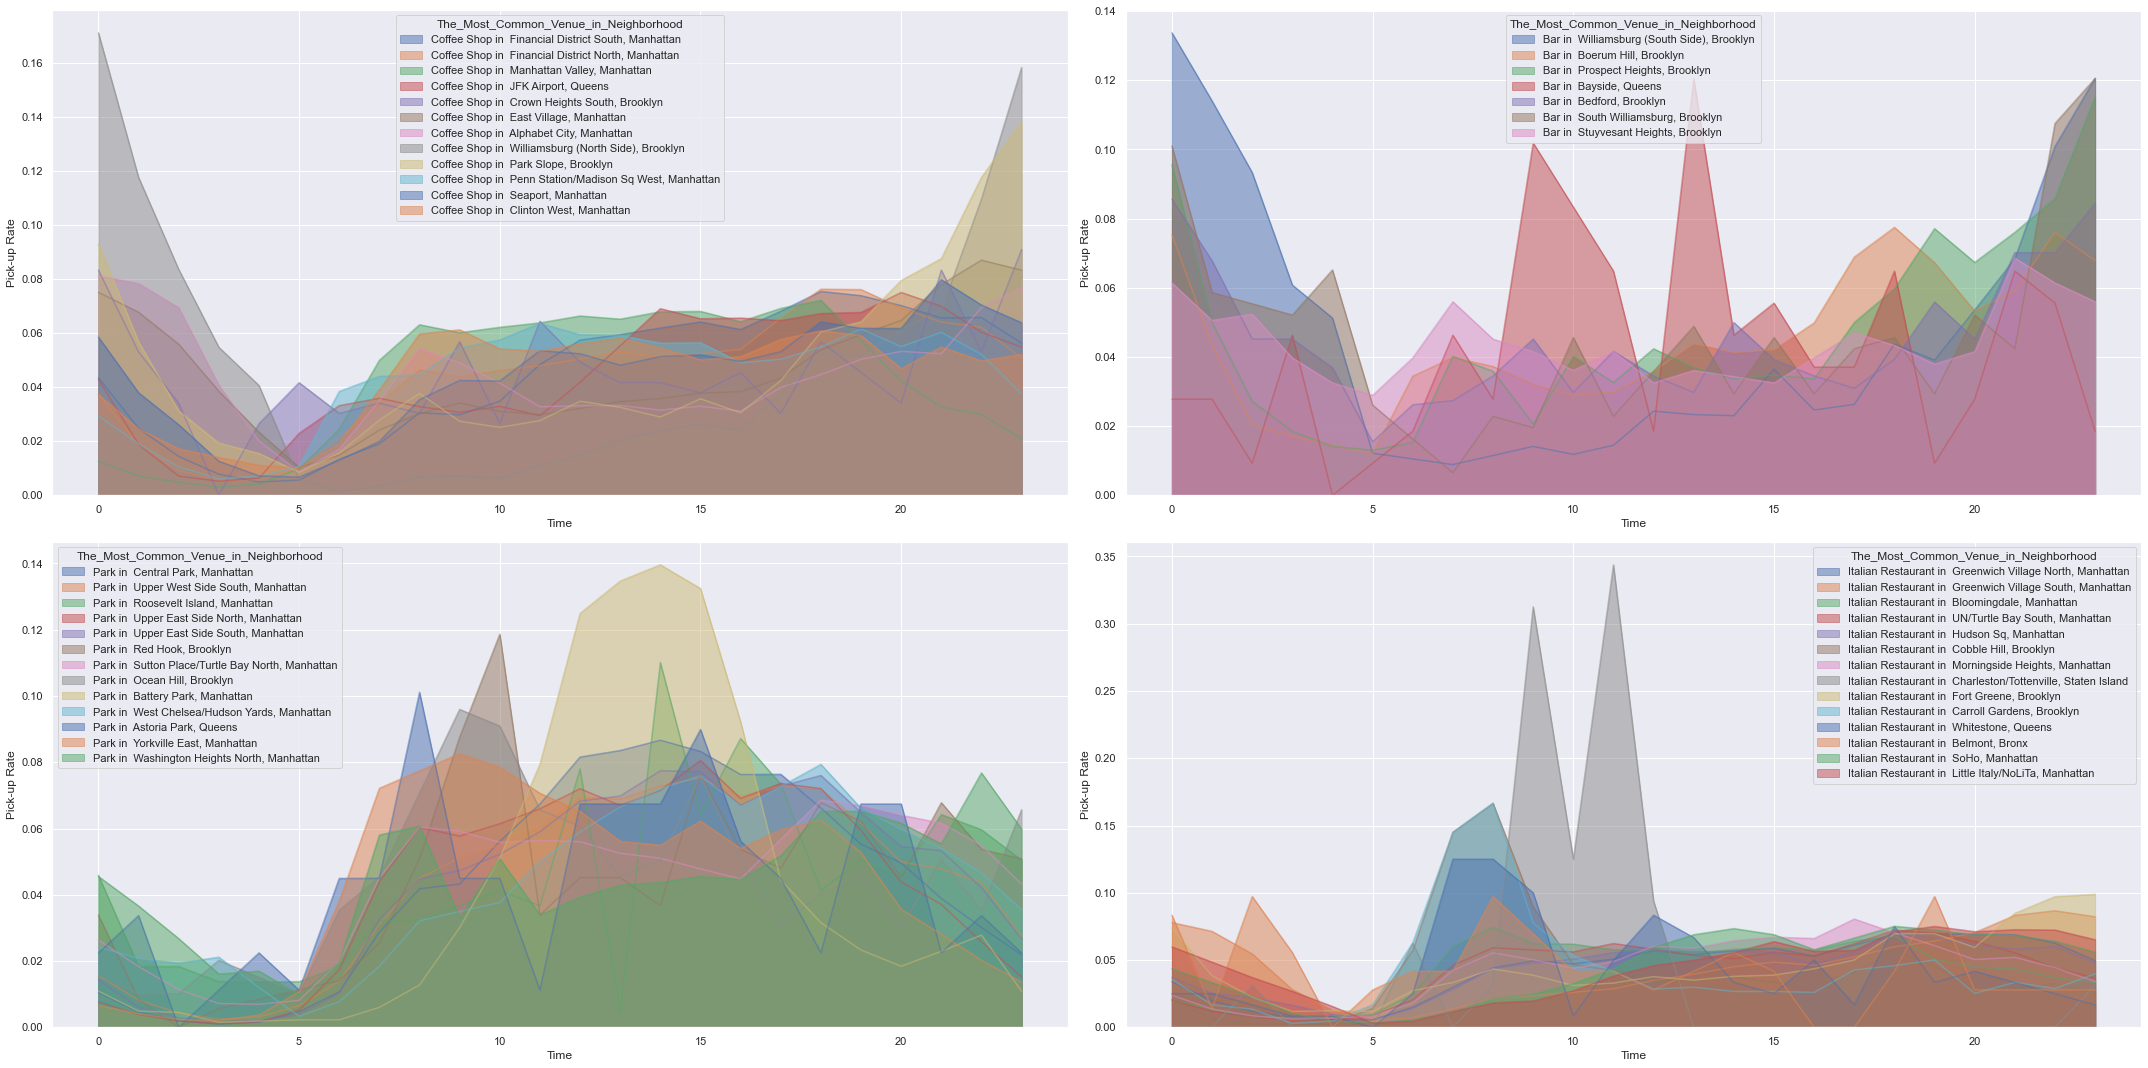

In [20]:
colnm = [trip_time_coffee_shop, trip_time_bar, trip_time_park, trip_time_italian_restaurant]
plt.figure(figsize = (30, 15))

for i in range(4):
    colnm[i].plot(kind='area', stacked=False, ax=plt.subplot(2,2,i+1))
    plt.xlabel('Time')
    plt.ylabel('Pick-up Rate')
plt.tight_layout()
print('\nFigure 2: Univariate Histograms')

## Results and Discussion <a name="results"></a>

Above analysis shows that although different zones have different pick-up rate in a day, we still can see zones with same type of nearby venues have similiar curve of pick-up rate.  For example, if the common nearby venue is Park or Italian restaurant, the pick-up rate in daytime is higher, but for Bar and Coffee Shop, the pick-up rate at night is higher.
However, we still can find exceptions in above results like 'Italian Restaurant in Charleston/Tottenville, Staten Island' and 'Bar in Bayside, Queens', which mean the nearby venue is not the only factor affects taxi pick-up rate, we will still keep exploring data and find the unknown factors out.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to find out a general pattern between taxi engagement time and neighborhoods to help a new taxi driver to find a passenger more efficiently.  We find some relationship between nearby venues and pick-up time, it could be a reference for a new taxi driver when he/she wants to find a potential passenger more quickly according to nearby venue.  I think this is a start for finding out a pattern to help taxi drivers' work.